In [1]:
# Import the google drive folders that contain the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/DSC680/Weeks5-8/Week8/datasets/

/content/drive/MyDrive/DSC680/Weeks5-8/Week8/datasets


In [3]:
%ls

meets.csv             openpowerlifting_full-cleaned.csv  pml-training_full.csv
megaGymDataset.csv    openpowerlifting_short.csv
openpowerlifting.csv  pml-testing.csv


In [4]:
import numpy as np 
import pandas as pd 
import plotly.express as px

In [5]:
gym_data = pd.read_csv('./megaGymDataset.csv')
gym_data.columns = gym_data.columns.str.replace('Unnamed: 0', 'index')
gym_data

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


In [6]:
missing_values_count = gym_data.isnull().sum()
missing_values_count

index            0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment        0
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

In [7]:
gym_data.dtypes

index           int64
Title          object
Desc           object
Type           object
BodyPart       object
Equipment      object
Level          object
Rating        float64
RatingDesc     object
dtype: object

In [8]:
print("Row count:\t" + str(gym_data.shape[0]))
print("Col count:\t" + str(gym_data.shape[1]))

Row count:	2918
Col count:	9


In [9]:
count_exercises = gym_data.groupby(['BodyPart']).count()
count_exercises

,index,Title,Desc,Type,Equipment,Level,Rating,RatingDesc
BodyPart,,,,,,,,
Abdominals,662,662,298,662,662,662,112,94
Abductors,21,21,8,21,21,21,10,9
Adductors,17,17,7,17,17,17,13,10
Biceps,168,168,101,168,168,168,55,53
Calves,47,47,26,47,47,47,26,26
Chest,262,262,149,262,262,262,113,90
Forearms,31,31,16,31,31,31,24,23
Glutes,81,81,29,81,81,81,25,22
Hamstrings,121,121,50,121,121,121,85,71


In [10]:
count_exercises= count_exercises.sort_values(by='index', ascending= False)
fig = px.bar(count_exercises, x=count_exercises.index, y='index')
fig.show()

In [11]:
beginner = gym_data[gym_data.Level == 'Beginner']
beginner

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
11,11,Bench barbell roll-out,The bench barbell roll-out is a challenging ex...,Strength,Abdominals,Barbell,Beginner,8.3,Average
12,12,Barbell Side Bend,NaN,Strength,Abdominals,Barbell,Beginner,7.0,Average
20,20,Advanced Kettlebell Windmill,NaN,Strength,Abdominals,Kettlebells,Beginner,8.3,Average
22,22,Kettlebell Pass Between The Legs,NaN,Strength,Abdominals,Kettlebells,Beginner,7.3,Average
40,40,Dumbbell spell caster,The dumbbell spell caster is an exercise that ...,Strength,Abdominals,Dumbbell,Beginner,9.3,Average
...,...,...,...,...,...,...,...,...,...
2841,2841,Low Cable Triceps Extension,NaN,Strength,Triceps,Cable,Beginner,8.2,Average
2889,2889,Standing Towel Triceps Extension,NaN,Strength,Triceps,Body Only,Beginner,6.5,Average
2892,2892,Overhead Triceps,NaN,Stretching,Triceps,Body Only,Beginner,3.3,Average
2910,2910,Supine Chest Throw,NaN,Plyometrics,Triceps,Medicine Ball,Beginner,8.2,Average


In [12]:
body_only =beginner[beginner.Equipment == 'Body Only']
body_only

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
194,194,Gorilla Chin/Crunch,NaN,Strength,Abdominals,Body Only,Beginner,9.0,Average
202,202,Crunch - Hands Overhead,NaN,Strength,Abdominals,Body Only,Beginner,8.6,Average
204,204,Stomach Vacuum,NaN,Stretching,Abdominals,Body Only,Beginner,8.5,Average
208,208,Butt-Ups,NaN,Strength,Abdominals,Body Only,Beginner,8.3,Average
217,217,Janda Sit-Up,NaN,Strength,Abdominals,Body Only,Beginner,7.4,Average
...,...,...,...,...,...,...,...,...,...
2175,2175,Slow Jog,NaN,Cardio,Quadriceps,Body Only,Beginner,0.0,NaN
2178,2178,Square Hop,NaN,Plyometrics,Quadriceps,Body Only,Beginner,0.0,NaN
2731,2731,Seated Front Deltoid,NaN,Stretching,Shoulders,Body Only,Beginner,4.5,Average
2889,2889,Standing Towel Triceps Extension,NaN,Strength,Triceps,Body Only,Beginner,6.5,Average


In [13]:
beginner_bodyOnly = body_only.groupby(['BodyPart']).count()
beginner_bodyOnly= beginner_bodyOnly.sort_values(by='index')
fig = px.bar(beginner_bodyOnly, x=beginner_bodyOnly.index, y='index', color ='index')
fig.show()

In [14]:
bodyPart_dist=gym_data.groupby(['Type','BodyPart']).count()
bodyPart_dist

index  Title  Desc  Equipment  Level  Rating  \
Type      BodyPart                                                    
Cardio    Abdominals       2      2     0          2      2       0   
          Calves           1      1     0          1      1       0   
          Chest            1      1     0          1      1       0   
          Hamstrings       1      1     1          1      1       1   
          Middle Back      1      1     1          1      1       1   
...                      ...    ...   ...        ...    ...     ...   
Strongman Forearms         2      2     1          2      2       2   
          Hamstrings       1      1     0          1      1       1   
          Lower Back       4      4     0          4      4       4   
          Quadriceps      10     10     3         10     10      10   
          Shoulders        4      4     0          4      4       4   

                       RatingDesc  
Type      BodyPart                 
Cardio    Abdominals            0  
          Calves                0  
          Chest                 0  
          Hamstrings            1  
          Middle Back           1  
...                           ...  
Strongman Forearms              2  
          Hamstrings            1  
          Lower Back            4  
          Quadriceps            8  
          Shoulders             4  

[65 rows x 7 columns]

In [15]:
bodyPart_dist=bodyPart_dist.groupby(level=[0,1]).sum()
bodyPart_dist

index  Title  Desc  Equipment  Level  Rating  \
Type      BodyPart                                                    
Cardio    Abdominals       2      2     0          2      2       0   
          Calves           1      1     0          1      1       0   
          Chest            1      1     0          1      1       0   
          Hamstrings       1      1     1          1      1       1   
          Middle Back      1      1     1          1      1       1   
...                      ...    ...   ...        ...    ...     ...   
Strongman Forearms         2      2     1          2      2       2   
          Hamstrings       1      1     0          1      1       1   
          Lower Back       4      4     0          4      4       4   
          Quadriceps      10     10     3         10     10      10   
          Shoulders        4      4     0          4      4       4   

                       RatingDesc  
Type      BodyPart                 
Cardio    Abdominals            0  
          Calves                0  
          Chest                 0  
          Hamstrings            1  
          Middle Back           1  
...                           ...  
Strongman Forearms              2  
          Hamstrings            1  
          Lower Back            4  
          Quadriceps            8  
          Shoulders             4  

[65 rows x 7 columns]

In [16]:
allTypes =(gym_data["Type"].unique())
len(allTypes)

7

In [17]:
typeDfs = []
for i in range(7):
    typeDfs.append(bodyPart_dist.iloc[bodyPart_dist.index.get_level_values('Type') == allTypes[i]])

In [18]:
cardio =bodyPart_dist.iloc[bodyPart_dist.index.get_level_values('Type') == 'Cardio']

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=4, cols=2,
    specs=[[{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"}],
          ])

fig.add_trace(go.Pie(values=typeDfs[0]['index'].values, title=allTypes[0], labels=typeDfs[0].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)
    
fig.add_trace(go.Pie(values=typeDfs[1]['index'].values, title=allTypes[1], labels=typeDfs[1].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)
fig.add_trace(go.Pie(values=typeDfs[2]['index'].values, title=allTypes[2], labels=typeDfs[2].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)
fig.add_trace(go.Pie(values=typeDfs[3]['index'].values, title=allTypes[3],labels=typeDfs[3].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)
fig.add_trace(go.Pie(values=typeDfs[4]['index'].values, title=allTypes[4], labels=typeDfs[4].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=3, col=1)
fig.add_trace(go.Pie(values=typeDfs[5]['index'].values, title=allTypes[5], labels=typeDfs[5].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=3, col=2)
fig.add_trace(go.Pie(values=typeDfs[6]['index'].values, title=allTypes[6], labels=typeDfs[6].index,marker=dict(colors=['#100b','#f00560'], line=dict( width=2.5))),
              row=4, col=1)
fig.update_layout(height=900, showlegend=False)
fig.update_layout(height=1200, showlegend=False)

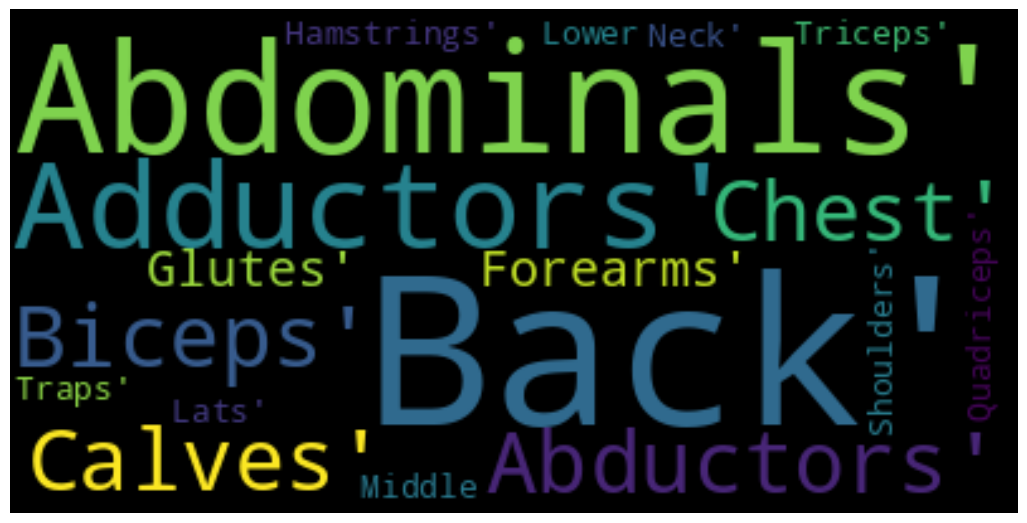

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

text = gym_data["BodyPart"].unique()

wordcloud = WordCloud(max_words=1000000,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
ratingSorted= gym_data.sort_values(by='Rating',ascending=False)
ratingSorted =ratingSorted.head(10)
ratingSorted

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2065,2065,Single-Leg Press,The single-leg leg press is an exercise target...,Strength,Quadriceps,Machine,Intermediate,9.6,Average
1195,1195,Rickshaw Carry,NaN,Strongman,Forearms,Other,Beginner,9.6,Average
1179,1179,Palms-down wrist curl over bench,The palms-down wrist curl over bench is an exe...,Strength,Forearms,Barbell,Intermediate,9.5,Average
2525,2525,Dumbbell front raise to lateral raise,The dumbbell front raise to lateral raise is a...,Strength,Shoulders,Dumbbell,Intermediate,9.5,Average
1577,1577,Atlas Stones,NaN,Strongman,Lower Back,Other,Intermediate,9.5,Average
731,731,Incline Hammer Curls,NaN,Strength,Biceps,Dumbbell,Beginner,9.5,Average
88,88,Landmine twist,The landmine twist is a rotational abdominal m...,Strength,Abdominals,Other,Intermediate,9.5,Average
1798,1798,Clean from Blocks,NaN,Olympic Weightlifting,Quadriceps,Barbell,Beginner,9.5,Average
1451,1451,Weighted pull-up,The weighted pull-up is a more advanced variat...,Strength,Lats,Other,Intermediate,9.5,Average
1695,1695,T-Bar Row with Handle,NaN,Strength,Middle Back,Other,Intermediate,9.5,Average


<BarContainer object of 10 artists>

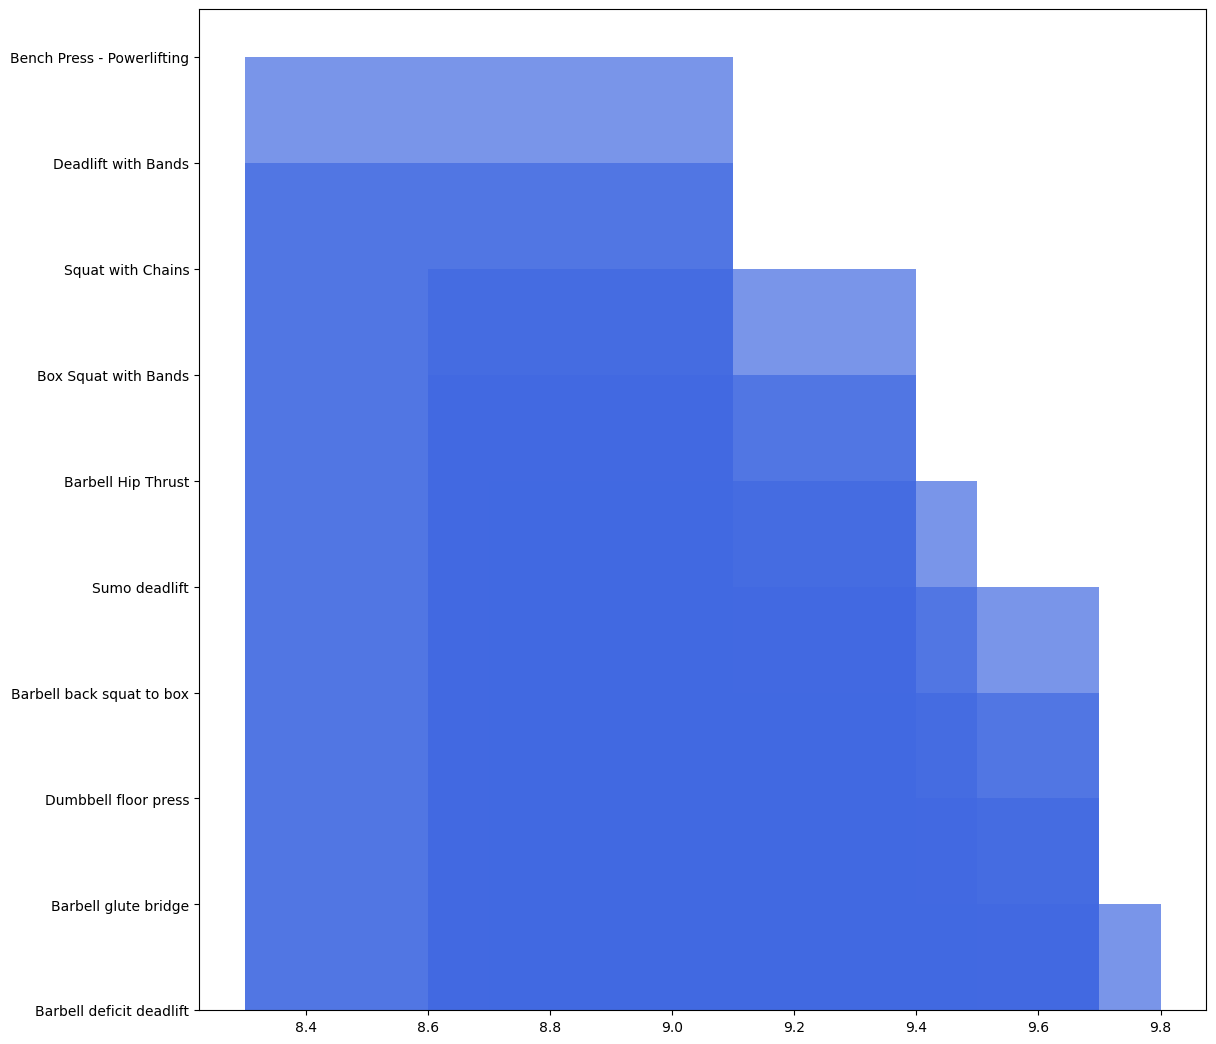

In [22]:
ratingSorted= gym_data[gym_data['Type']=='Powerlifting'].sort_values(by='Rating',ascending=False)
ratingSorted =ratingSorted.head(10)
plt.bar(ratingSorted.Rating, ratingSorted.Title,color='royalblue', alpha=0.7)

<BarContainer object of 10 artists>

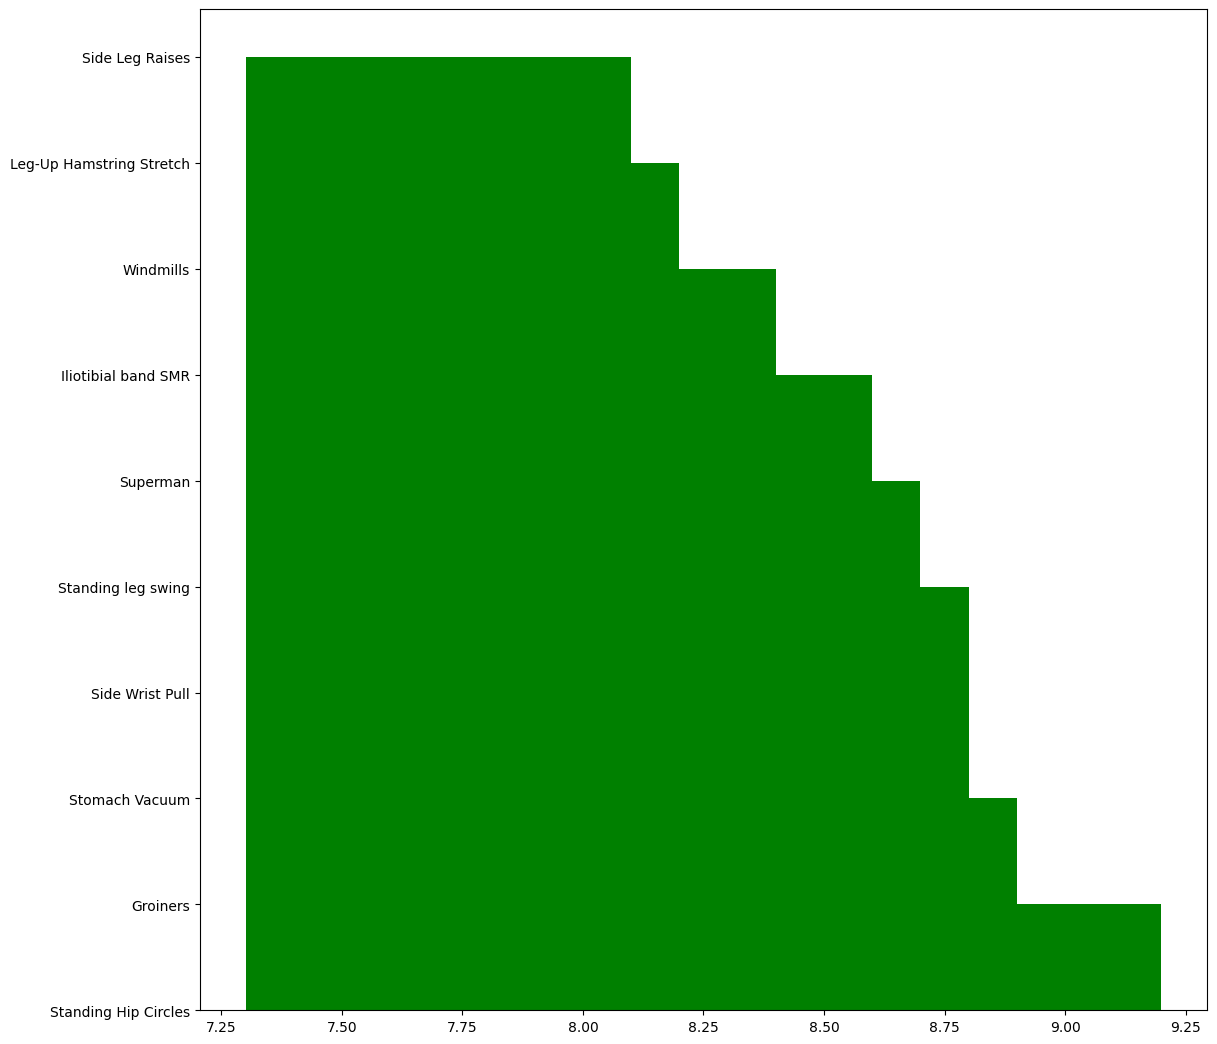

In [23]:
rating_stretch= gym_data[gym_data['Type']=='Stretching'].sort_values(by='Rating',ascending=False)
rating_stretch =rating_stretch.head(10)
plt.bar(rating_stretch.Rating, rating_stretch.Title,color='green')

<BarContainer object of 10 artists>

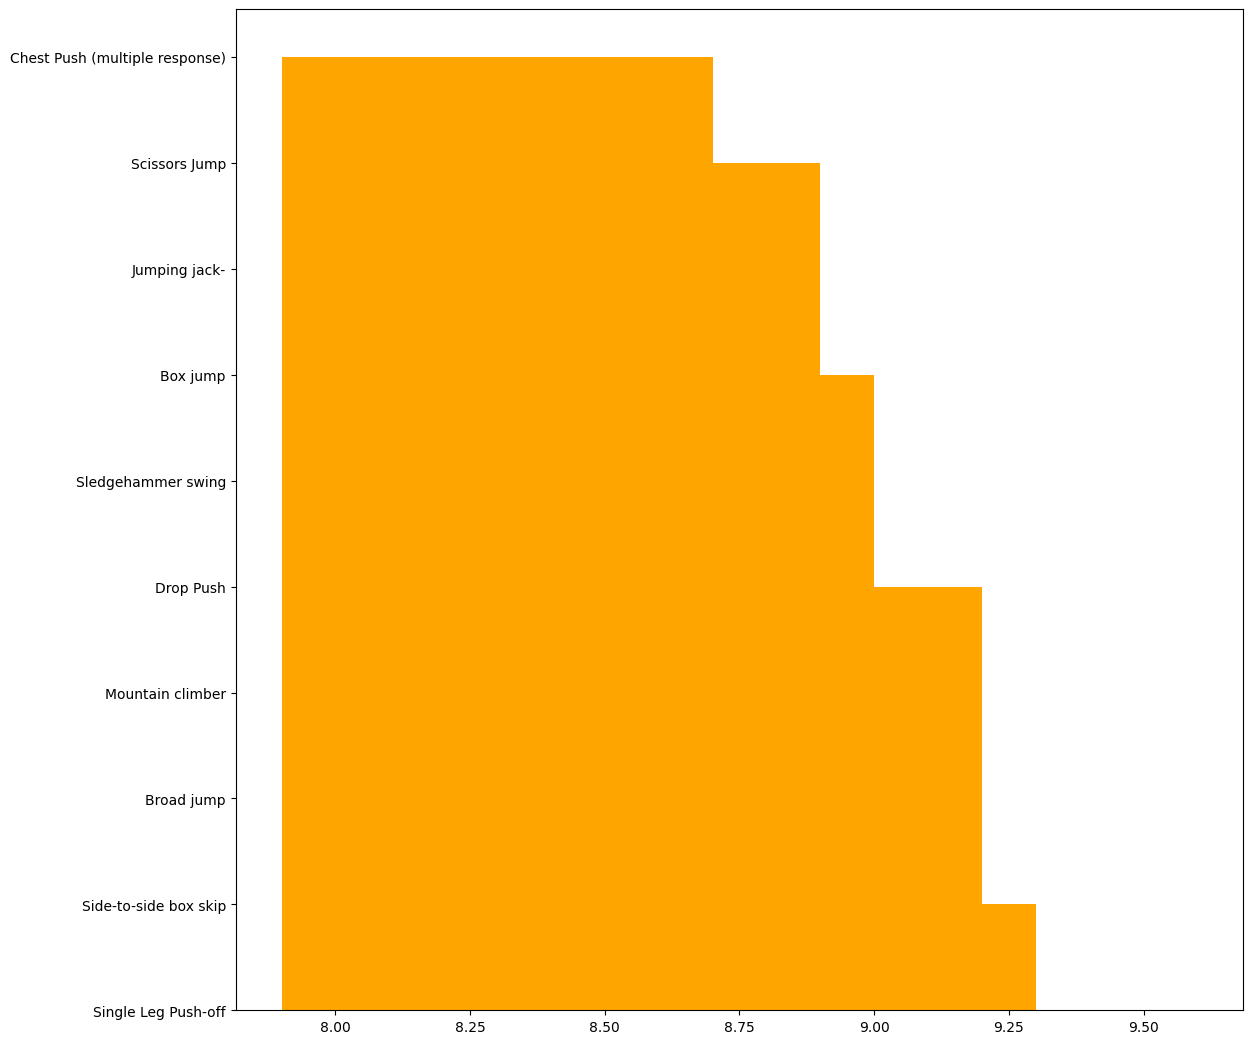

In [24]:
rating_plyo= gym_data[gym_data['Type']=='Plyometrics'].sort_values(by='Rating',ascending=False)
rating_plyo =rating_plyo.head(10)
plt.bar(rating_plyo.Rating, rating_plyo.Title,color='orange')

In [25]:
level_counts=gym_data.groupby(['Level']).count()
level_counts

,index,Title,Desc,Type,BodyPart,Equipment,Rating,RatingDesc
Level,,,,,,,,
Beginner,459,459,108,459,459,459,459,369
Expert,13,13,10,13,13,13,7,7
Intermediate,2446,2446,1250,2446,2446,2446,565,486


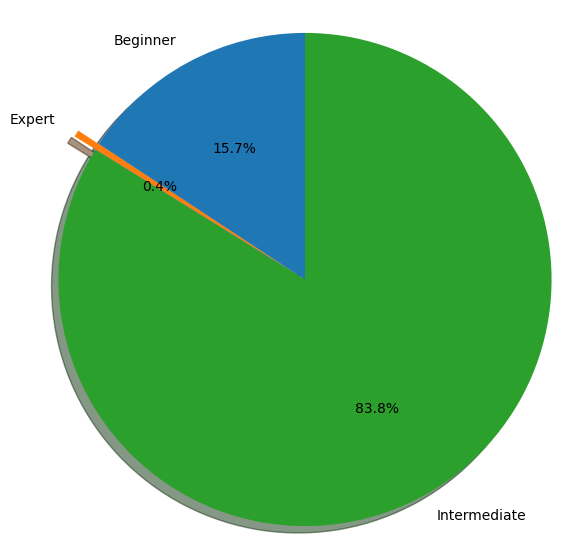

<Figure size 100x100 with 0 Axes>

In [26]:
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(level_counts.Title, explode=explode, labels=level_counts.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(1,1))

plt.show()

In [27]:
equip_data=gym_data.groupby(['Equipment']).count()
equip_data

,index,Title,Desc,Type,BodyPart,Level,Rating,RatingDesc
Equipment,,,,,,,,
Bands,100,100,49,100,100,100,30,20
Barbell,282,282,161,282,282,282,180,168
Body Only,1078,1078,404,1078,1078,1078,269,196
Cable,226,226,149,226,226,226,77,77
Dumbbell,516,516,246,516,516,516,140,129
E-Z Curl Bar,22,22,14,22,22,22,11,11
Exercise Ball,35,35,28,35,35,35,12,11
Foam Roll,11,11,8,11,11,11,9,9
Kettlebells,149,149,53,149,149,149,57,39


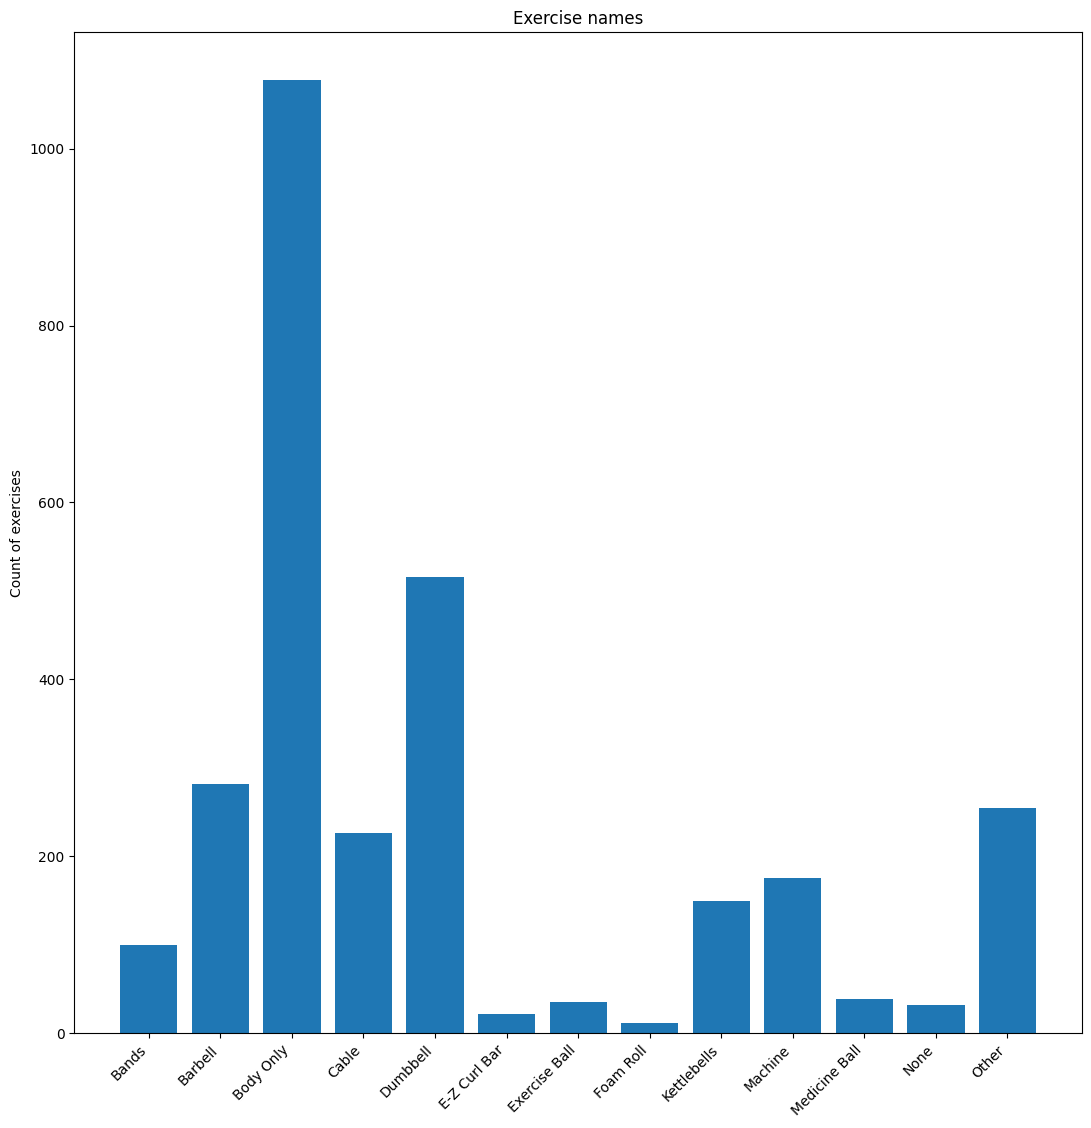

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(equip_data.index, equip_data.Title)

ax.set_ylabel('Count of exercises')
ax.set_title('Exercise names')
plt.xticks(rotation=45, ha='right')

plt.show()

In [29]:
leg_exer= gym_data[gym_data['BodyPart']=='Quadriceps'].sort_values(by='Rating',ascending=False)
leg_exer_best =leg_exer[leg_exer['Type']=='Strength'].head(5)
leg_exer_best

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2065,2065,Single-Leg Press,The single-leg leg press is an exercise target...,Strength,Quadriceps,Machine,Intermediate,9.6,Average
1799,1799,Barbell Full Squat,The barbell back squat is a popular compound m...,Strength,Quadriceps,Barbell,Intermediate,9.4,Average
1804,1804,Barbell walking lunge,The barbell walking lunge tests your ability t...,Strength,Quadriceps,Barbell,Intermediate,9.2,Average
1872,1872,Front Squats With Two Kettlebells,NaN,Strength,Quadriceps,Kettlebells,Beginner,9.2,Average
1873,1873,Kettlebell Pistol Squat,NaN,Strength,Quadriceps,Kettlebells,Beginner,9.1,Average


In [30]:
leg_exer_worst= gym_data[gym_data['BodyPart']=='Quadriceps'].sort_values(by='Rating',ascending=True)
leg_exer_worst =leg_exer_worst[leg_exer_worst['Type']=='Strength'].head(5)
leg_exer_worst

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2152,2152,Thigh killa,The thigh killa is a challenging lower-body bo...,Strength,Quadriceps,Body Only,Intermediate,0.0,NaN
2083,2083,Leverage Deadlift,NaN,Strength,Quadriceps,Machine,Beginner,0.0,NaN
2029,2029,Barbell Squat To A Box,NaN,Strength,Quadriceps,Other,Beginner,0.0,NaN
2027,2027,Single-leg knee-tap squat,The single-leg knee-tap squat is a single-leg ...,Strength,Quadriceps,Other,Intermediate,0.0,Average
2016,2016,Dumbbell walking lunge-,The dumbbell walking lunge is a popular lower-...,Strength,Quadriceps,Other,Intermediate,0.0,Average


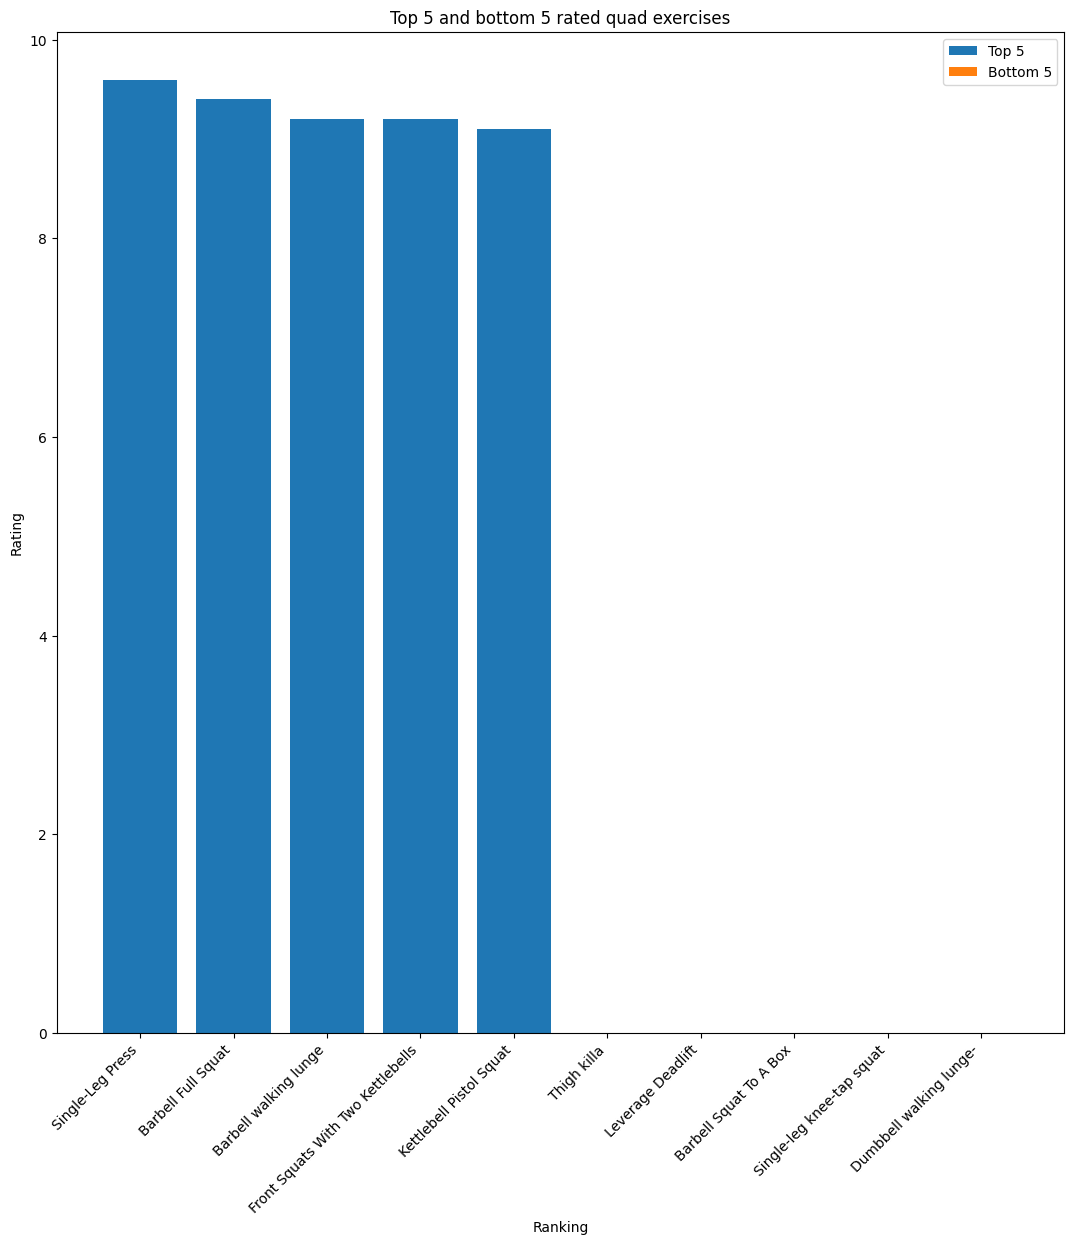

In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
     
plt.bar(leg_exer_best.Title,leg_exer_best.Rating, label = 'Top 5')
plt.bar(leg_exer_worst.Title,leg_exer_worst.Rating, label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated quad exercises")
plt.legend()
plt.show()

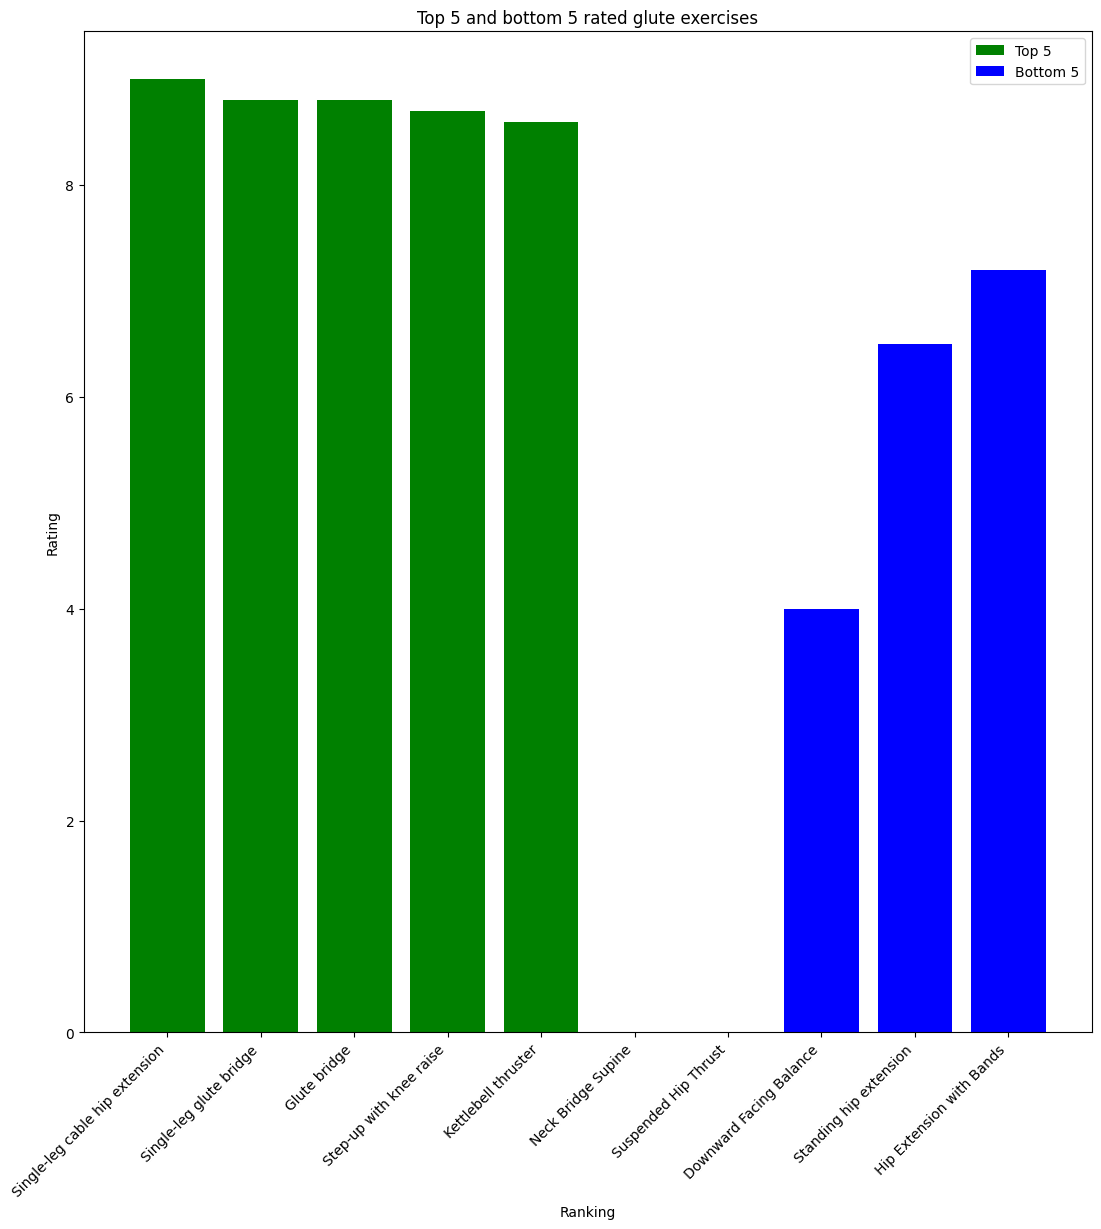

In [32]:
glute_exer= gym_data[gym_data['BodyPart']=='Glutes'].sort_values(by='Rating',ascending=False)
glute_exer_best =glute_exer[glute_exer['Type']=='Strength'].head(5)

glute_exer_worst= gym_data[gym_data['BodyPart']=='Glutes'].sort_values(by='Rating',ascending=True)
glute_exer_worst =glute_exer_worst[glute_exer_worst['Type']=='Strength'].head(5)

     
plt.bar(glute_exer_best.Title,glute_exer_best.Rating,color='g', label = 'Top 5')
plt.bar(glute_exer_worst.Title,glute_exer_worst.Rating,color='b', label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated glute exercises")
plt.legend()
plt.show()

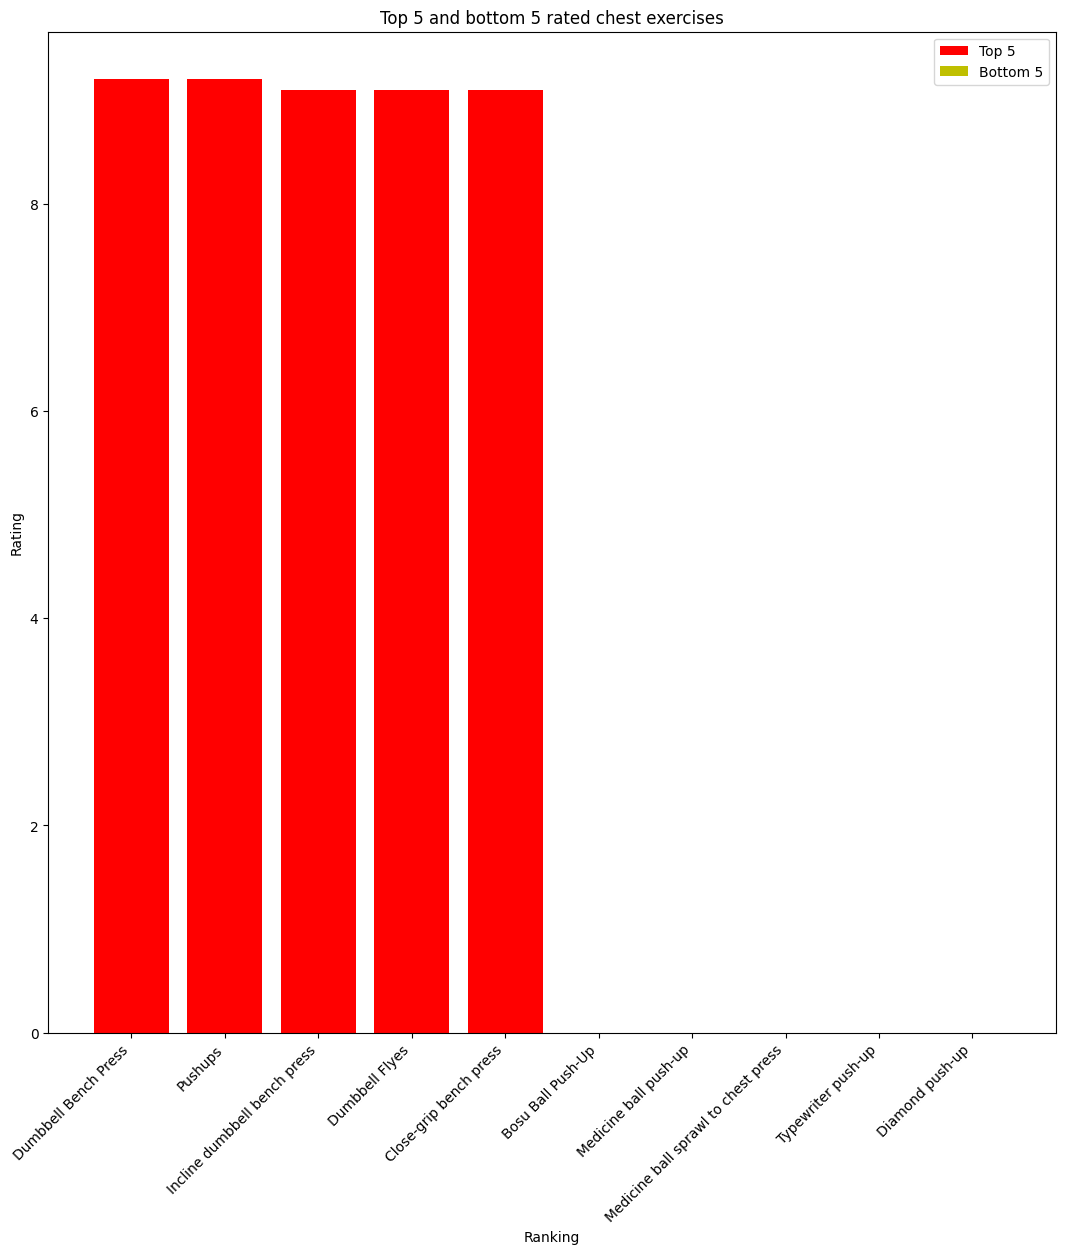

In [33]:
chest_exer= gym_data[gym_data['BodyPart']=='Chest'].sort_values(by='Rating',ascending=False)
chest_exer_best =chest_exer[chest_exer['Type']=='Strength'].head(5)

chest_exer_worst= gym_data[gym_data['BodyPart']=='Chest'].sort_values(by='Rating',ascending=True)
chest_exer_worst =chest_exer_worst[chest_exer_worst['Type']=='Strength'].head(5)

     
plt.bar(chest_exer_best.Title,chest_exer_best.Rating,color='r', label = 'Top 5')
plt.bar(chest_exer_worst.Title,chest_exer_worst.Rating,color='y', label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated chest exercises")
plt.legend()
plt.show()

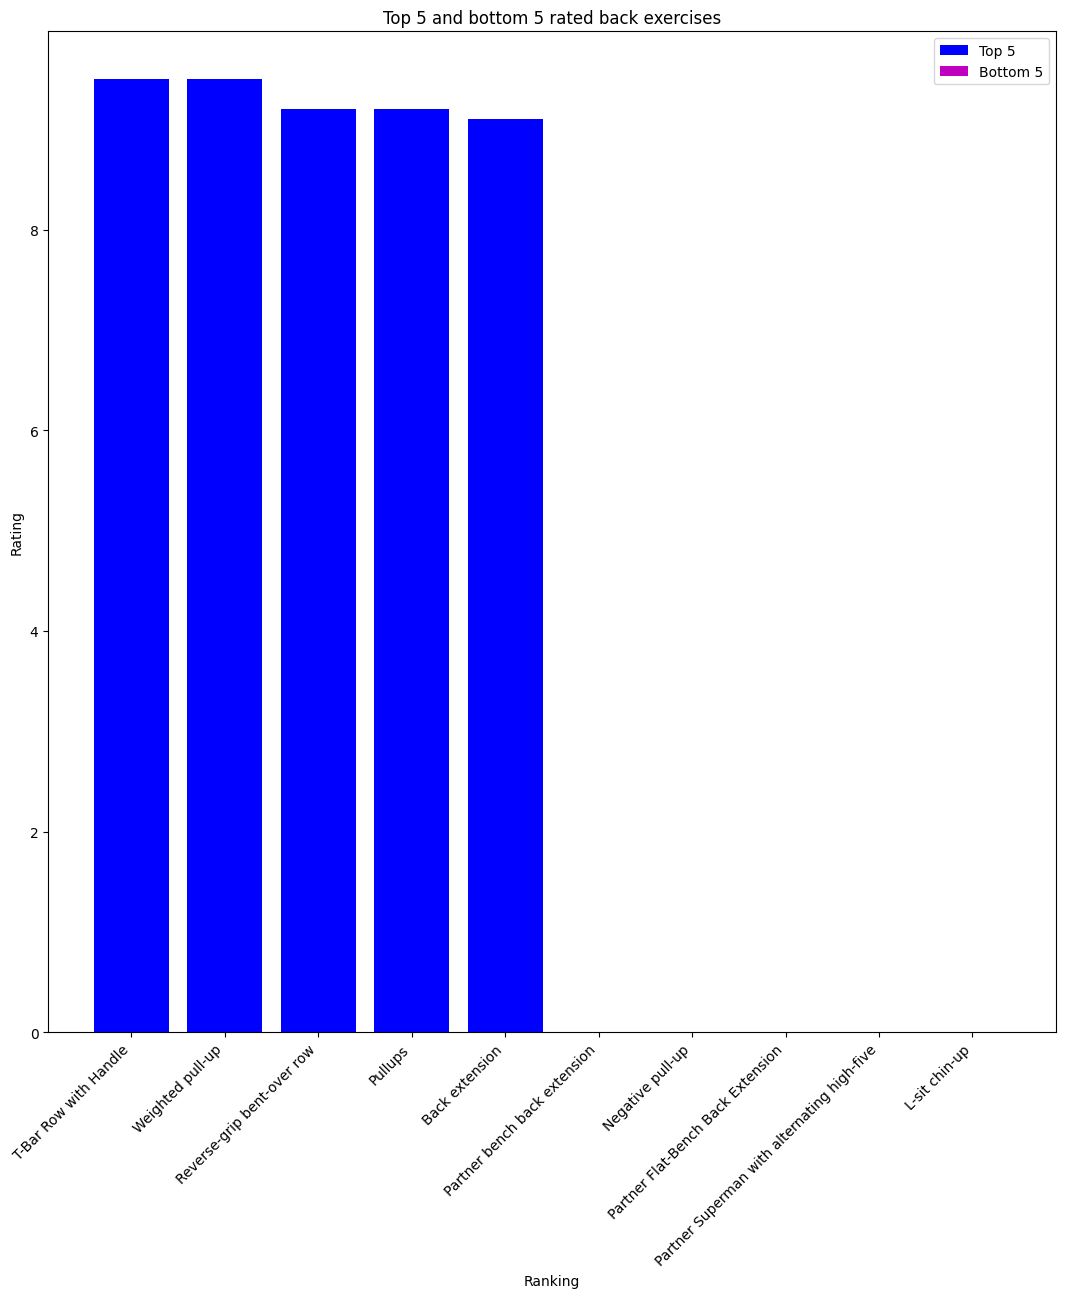

In [34]:
options = ['Lats','Lower Back','Middle Back']
back_exer= gym_data[gym_data['BodyPart'].isin(options)].sort_values(by='Rating',ascending=False)
back_exer_best =back_exer[back_exer['Type']=='Strength'].head(5)

back_exer_worst= gym_data[gym_data['BodyPart'].isin(options)].sort_values(by='Rating',ascending=True)
back_exer_worst =back_exer_worst[back_exer_worst['Type']=='Strength'].head(5)

     
plt.bar(back_exer_best.Title,back_exer_best.Rating,color='b', label = 'Top 5')
plt.bar(back_exer_worst.Title,back_exer_worst.Rating,color='m', label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated back exercises")
plt.legend()
plt.show()